In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

from shapely.geometry import Point
import geopandas as gpd

In [2]:
# Reading availability data

may_df = pd.read_csv('data/may.csv')

In [3]:
may_df.head()

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247000,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,Bird
1,2019-05-01 00:01:41.247000,36.191252,-86.772945,PoweredXWRWC,Powered,35.0,scooter,0.0,Bird
2,2019-05-01 00:01:41.247000,36.144752,-86.806293,PoweredMEJEH,Powered,90.0,scooter,0.0,Bird
3,2019-05-01 00:01:41.247000,36.162056,-86.774688,Powered1A7TC,Powered,88.0,scooter,0.0,Bird
4,2019-05-01 00:01:41.247000,36.150973,-86.783109,Powered2TYEF,Powered,98.0,scooter,0.0,Bird


In [4]:
may_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20292503 entries, 0 to 20292502
Data columns (total 9 columns):
pubdatetime    object
latitude       float64
longitude      float64
sumdid         object
sumdtype       object
chargelevel    float64
sumdgroup      object
costpermin     float64
companyname    object
dtypes: float64(4), object(5)
memory usage: 1.4+ GB


In [5]:
may_df.memory_usage(deep=True) * 1e-6

Index             0.000072
pubdatetime    1328.384295
latitude        162.340024
longitude       162.340024
sumdid         1245.718161
sumdtype        974.049065
chargelevel     162.340024
sumdgroup       974.040144
costpermin      162.340024
companyname     914.993263
dtype: float64

In [6]:
# Drop some columns to help memory

may_df = may_df.drop(columns= ['sumdtype','chargelevel','costpermin','sumdgroup'])

In [7]:
# Changing type of date column so that memory is used efficiently

may_df.pubdatetime = pd.to_datetime(may_df.pubdatetime)

In [8]:
may_df.memory_usage(deep=True) * 1e-6

Index             0.000072
pubdatetime     162.340024
latitude        162.340024
longitude       162.340024
sumdid         1245.718161
companyname     914.993263
dtype: float64

In [9]:
may_df.sumdid.value_counts()

StandardNW5HJFO4R32LY                           8921
PoweredIE7H5RIN474PE                            8921
PoweredUK65LOU3K5N7G                            8748
PoweredIOHG2G3XKATUL                            8576
PoweredJCKMQCAL2SSNJ                            8521
Powered4NYK5PWADVIAU                            8439
PoweredO54PUN6MPIQ3A                            8339
Powered2UM6OD6W4KRY7                            8317
PoweredW2NM2LRPUCDLI                            8190
Powered5534BHQRBTGDT                            8081
PoweredEQAYBD6RV2GVL                            8075
PoweredTB6JVKPTKJCQL                            8048
PoweredGADDQW3QIT3LM                            7911
PoweredFO4WSFEOU5VWV                            7906
PoweredKZQINR7YHPOLL                            7878
Powered4EJEZQ3KHHGUT                            7823
PoweredDQH3R45CUARGY                            7811
PoweredD5RFGKRX4NGPS                            7773
PoweredCPBMGOVZOHE4Z                          

### Hypothesis 1:

For some devices the company took location data for each 5 minutes

It makes 31x24x12 = 8928 rows. It is almost the same with the maximum count of sumdid (8921)

In [10]:
# Let's see if the location of scooter is changed or not

may_df[may_df.sumdid=='PoweredIE7H5RIN474PE']

,pubdatetime,latitude,longitude,sumdid,companyname
1365,2019-05-01 00:04:56.910,36.150001,-86.761955,PoweredIE7H5RIN474PE,Lime
3607,2019-05-01 00:09:56.970,36.150001,-86.761955,PoweredIE7H5RIN474PE,Lime
5783,2019-05-01 00:14:58.037,36.150001,-86.761955,PoweredIE7H5RIN474PE,Lime
7982,2019-05-01 00:19:57.383,36.149929,-86.761890,PoweredIE7H5RIN474PE,Lime
10158,2019-05-01 00:24:57.743,36.149929,-86.761890,PoweredIE7H5RIN474PE,Lime
12341,2019-05-01 00:29:57.790,36.149929,-86.761890,PoweredIE7H5RIN474PE,Lime
14560,2019-05-01 00:34:58.227,36.149929,-86.761890,PoweredIE7H5RIN474PE,Lime
16732,2019-05-01 00:39:58.310,36.150012,-86.761943,PoweredIE7H5RIN474PE,Lime
18841,2019-05-01 00:44:58.557,36.150012,-86.761943,PoweredIE7H5RIN474PE,Lime
21009,2019-05-01 00:49:58.687,36.150012,-86.761943,PoweredIE7H5RIN474PE,Lime


#### Fact 1:

For sumdid PoweredIE7H5RIN474PE, the company took location for each 5 minutes

### Hypothesis 2:

The company Lime is getting locations almost every 5 minutes??

In [11]:
may_df.companyname.value_counts()

Lime      7120576
Bird      4334006
Lyft      3112581
Jump      2984630
Spin      1301001
Gotcha     915314
Bolt       524395
Name: companyname, dtype: int64

In [12]:
def hist_comp(df, company):
    if company=='All':
        plt.hist(df.sumdid.value_counts().values)
        
    else:
        plt.hist(may_df[df.companyname==company].sumdid.value_counts().values)
        
    plt.title(company)

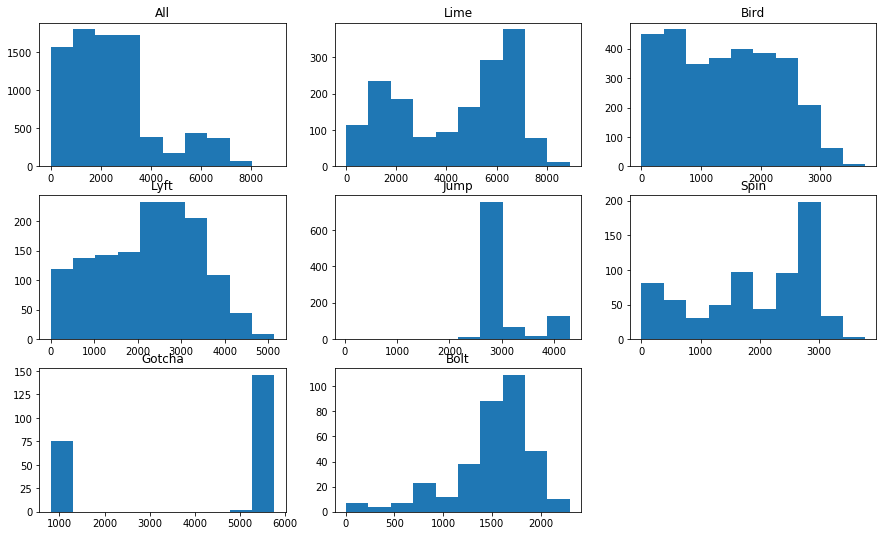

In [13]:
plt.figure(figsize=(15,9))

plt.subplot(3,3,1)
hist_comp(may_df, 'All')

plt.subplot(3,3,2)
hist_comp(may_df, 'Lime')

plt.subplot(3,3,3)
hist_comp(may_df, 'Bird')

plt.subplot(3,3,4)
hist_comp(may_df,'Lyft')

plt.subplot(3,3,5)
hist_comp(may_df,'Jump')

plt.subplot(3,3,6)
hist_comp(may_df,'Spin')

plt.subplot(3,3,7)
hist_comp(may_df,'Gotcha')

plt.subplot(3,3,8)
hist_comp(may_df,'Bolt')


Lime is taking locations from scooter very frequently
Jump may be taking locations from scooter at least once a 15 minutes
Gotcha may be taking once a 10 minutes.

### I will try to get rid of the rows in which, the scooter is NOT moving.

To understand whether the scooter moved or not, I will location differences.

In [14]:
# First I sorted the data by compyany, id and time 

may_sorted = may_df.sort_values(by=['companyname', 'sumdid', 'pubdatetime']).reset_index(drop=True)
may_sorted.head()

,pubdatetime,latitude,longitude,sumdid,companyname
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird
1,2019-05-26 20:10:42.750,36.161781,-86.773962,Powered11XTN,Bird
2,2019-05-26 20:15:42.853,36.161781,-86.773962,Powered11XTN,Bird
3,2019-05-26 20:20:43.130,36.161736,-86.773886,Powered11XTN,Bird
4,2019-05-26 20:25:43.317,36.161736,-86.773886,Powered11XTN,Bird


In [15]:
# Creating distance between two consecutive locations. Distance will be in km.

def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    Earth diameter is in km. Hence calculations in km.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


may_sorted['distance'] = haversine(may_sorted.longitude.shift(), may_sorted.latitude.shift(), 
                                  may_sorted.longitude, may_sorted.latitude)


In [16]:
may_sorted.head()

,pubdatetime,latitude,longitude,sumdid,companyname,distance
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird,NaN
1,2019-05-26 20:10:42.750,36.161781,-86.773962,Powered11XTN,Bird,0.006569
2,2019-05-26 20:15:42.853,36.161781,-86.773962,Powered11XTN,Bird,0.000000
3,2019-05-26 20:20:43.130,36.161736,-86.773886,Powered11XTN,Bird,0.008456
4,2019-05-26 20:25:43.317,36.161736,-86.773886,Powered11XTN,Bird,0.000000


In [17]:
map_first = folium.Map(location= [may_sorted.latitude[0], may_sorted.longitude[0]], zoom_start=20)

for i in range(50):
     
    loc = [may_sorted.latitude[i], may_sorted.longitude[i]]
    pop = ('SUMDID: ' + may_sorted.sumdid[i] + '<br/>' +
           'Location difference: ' + str(1000*may_sorted.distance[i]) + ' meters' + '<br/>' +
           'Time: ' + str(may_sorted.pubdatetime[i]) + '<br/>' +
           'Location: ' + str(may_sorted.latitude[i]) + ', ' + str(may_sorted.longitude[i]) )
    marker = folium.Marker(location = loc, popup = pop)
    
    marker.add_to(map_first)

map_first

### Problem: 
In 40 minutes there are 9 different locations however this scooter did not move obviously. I want to keep only one of these 9 locations by assuming they are same. I also want to keep 10th location because the scooter moved for that time. Hence I need to filter this data if location change is smaller than a threshold.

### Hypothesis 3:
Scooter may have a sensor that checks if the scooter has moved or not and if scooter moves, it will send the location info. The scooter checks the sensor each 5 minutes and if sensor says scooter moved it will send the location and reset the sensor. In theory, by that way, scooter sends the location info only if the scooter moves. However, if motion sensor is broken or somebody moves the scooter just a litlle bit (let`s say in order to open a pedesterian way), the scooter sends the location info although anyone does not use it. In addition, the accuracy of GPS is important here because even if the scooter is at the same exact location, it may recorded as if there was a small change in location. Hence in order to understand if the scooter actually moves or not, I will filter by location change.

In [18]:
print('Originally we have ' + str(may_sorted.shape[0]) + ' rows for May')

Originally we have 20292503 rows for May


### Solution:
I will filter by location change. If the distance between two consecutive rows is smaller than a threshold, I will drop the row.

I want to look if sumdid is changing or not.

Since I will look rows for only moving sumd. However, while checking only locations, if sumdid changes, location may change at the same time and I may take these rows mistakenly.

In [19]:
may_sorted['changed'] = may_sorted['sumdid'].ne(may_sorted['sumdid'].shift().bfill())
may_sorted.head()

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird,NaN,False
1,2019-05-26 20:10:42.750,36.161781,-86.773962,Powered11XTN,Bird,0.006569,False
2,2019-05-26 20:15:42.853,36.161781,-86.773962,Powered11XTN,Bird,0.000000,False
3,2019-05-26 20:20:43.130,36.161736,-86.773886,Powered11XTN,Bird,0.008456,False
4,2019-05-26 20:25:43.317,36.161736,-86.773886,Powered11XTN,Bird,0.000000,False


#### Assumption: If distance is smaller than a threshold, the scooter must not move

I want to keep rows if location is changed. I want to see when the scooter is seen first and last in a location.

### The question: When a scooter is seen last in a location?

#### How to choose threshold?

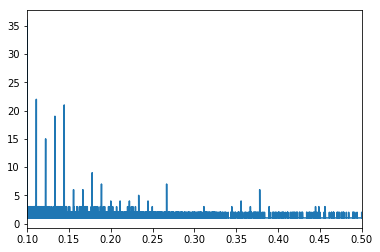

In [20]:
(may_sorted.distance.value_counts().sort_index()[0.1:0.5]).plot()

In [21]:
# I want to keep first and last rows at the same location to see how long the scooter is stayed in the range of threshold

threshold = 0.25 # 250 meters

may_sorted['distance_isgreater_thrsld'] = may_sorted.distance>threshold

may_sorted['last_on_same_loc'] = may_sorted.distance_isgreater_thrsld.shift(-1) | may_sorted.changed.shift(-1)

may_sorted.loc[may_sorted.index==len(may_sorted.index)-1, 'last_on_same_loc'] = True

may_sorted.head(590).tail(20)

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed,distance_isgreater_thrsld,last_on_same_loc
570,2019-05-31 22:35:17.347,36.153932,-86.784467,Powered11XTN,Bird,0.288865,False,True,False
571,2019-05-31 22:40:17.407,36.153932,-86.784467,Powered11XTN,Bird,0.000000,False,False,False
572,2019-05-31 22:45:17.780,36.154021,-86.784461,Powered11XTN,Bird,0.000868,False,False,False
573,2019-05-31 22:50:18.207,36.154021,-86.784461,Powered11XTN,Bird,0.000000,False,False,False
574,2019-05-31 22:55:18.430,36.154150,-86.784419,Powered11XTN,Bird,0.004739,False,False,False
575,2019-05-31 23:00:18.607,36.154150,-86.784419,Powered11XTN,Bird,0.000000,False,False,True
576,2019-05-31 23:10:19.430,36.163344,-86.791416,Powered11XTN,Bird,0.780137,False,True,False
577,2019-05-31 23:15:19.310,36.163232,-86.791389,Powered11XTN,Bird,0.003082,False,False,False
578,2019-05-31 23:20:19.540,36.163232,-86.791389,Powered11XTN,Bird,0.000000,False,False,False
579,2019-05-31 23:25:19.757,36.163326,-86.791374,Powered11XTN,Bird,0.001768,False,False,True


In [22]:
# I want to keep very first and very last row at the same location.

# If distance is greater than threshold, it means it is the first row at the location.
#     I want to keep this row as first row at a location, unless it is last row at that location at the same time
#     If a row is very first and very last row at the same location at the same time, it can be said that the scooter was actually not available at that location.
# The logic expression of this argument1:  distance_isgreater_thrsld AND NOT(last_on_same_loc)

# If sumdid is changed, it means it is the first row at the location.
#     I want to keep this row as first row at a location, unless it is last row at that location at the same time
#     If a row is very first and very last row at the same location at the same time, it can be said that the scooter was actually not available at that location.
# The logic expression of this argument2:  changed AND NOT(last_on_same_loc)

# If sumdid is not changed and distance is not greater than threshold, it means it is the last row at the location.
#     I want to keep this row as a last row at a location
# The logic expression of this argument3:  last_on_same_loc AND NOT(distance_isgreater_thrsld OR changed)

# Since I want to keep al three arguments, the final argument: argument1 OR argument2 OR argument3
# The logic expression of this final argument: (distance_isgreater_thrsld | changed) ^ last_on_same_loc

may_melted = may_sorted[((may_sorted.distance_isgreater_thrsld | may_sorted.changed) ^ 
                        may_sorted.last_on_same_loc) | 
                        (may_sorted.index==0) |
                        (may_sorted.index==len(may_sorted.index)-1)
                       ].reset_index(drop=True)

# Since some rows are omitted, I need to calculate distance again with new rows! Also if sumdid changed or not!!

may_melted['distance'] = haversine(may_melted.longitude.shift(), may_melted.latitude.shift(), 
                                  may_melted.longitude, may_melted.latitude)
may_melted['distance_isgreater_thrsld'] = may_melted.distance>threshold
may_melted['changed'] = may_melted['sumdid'].ne(may_melted['sumdid'].shift().bfill())

may_melted.head()

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed,distance_isgreater_thrsld,last_on_same_loc
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird,NaN,False,False,False
1,2019-05-26 20:45:44.100,36.161747,-86.773912,Powered11XTN,Bird,0.012133,False,False,True
2,2019-05-26 21:05:45.360,36.163459,-86.783549,Powered11XTN,Bird,1.071639,False,True,False
3,2019-05-26 21:45:46.647,36.163380,-86.783472,Powered11XTN,Bird,0.008576,False,False,True
4,2019-05-26 22:05:47.370,36.170259,-86.788817,Powered11XTN,Bird,0.595882,False,True,False


In [23]:
# I will keep only one row for the same scooter at the same location. 
# I will keep the last time of recording on the same location in a new column.

may_melted['pubdatetime_last'] = np.where(may_melted.distance_isgreater_thrsld & may_melted.last_on_same_loc, 
                                          may_melted.pubdatetime,
                                          may_melted.pubdatetime.shift(-1))

may_melted.loc[may_melted.index==len(may_melted.index)-1, 'pubdatetime_last'] = may_melted.loc[may_melted.index==len(may_melted.index)-1, 'pubdatetime']

may_melted.tail()

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last
569751,2019-05-26 23:53:24.000,36.163000,-86.778370,Powered9963670,Spin,0.090498,False,False,True,2019-05-26 23:58:24.243
569752,2019-05-26 23:58:24.243,36.160600,-86.775910,Powered9963670,Spin,0.273951,False,True,False,2019-05-27 08:18:43.477
569753,2019-05-27 08:18:43.477,36.161450,-86.777770,Powered9963670,Spin,0.206891,False,False,True,2019-05-28 14:59:51.137
569754,2019-05-28 14:59:51.137,36.156825,-86.782399,Powered9963670,Spin,0.515531,False,True,False,2019-05-29 05:00:23.573
569755,2019-05-29 05:00:23.573,36.156825,-86.782399,Powered9963670,Spin,0.000000,False,False,True,2019-05-29 05:00:23.573


In [24]:
# Since the first row at the same location is having when the scooter is seen last at that location, I will keep only that row
# The logic expression of the first row at the same location: distance_isgreater_thrsld OR changed

may_melted = may_melted[may_melted.distance_isgreater_thrsld | 
                        may_melted.changed |
                        may_melted.distance.isna()
                       ].reset_index(drop=True)

may_melted['changed'] = may_melted['sumdid'].ne(may_melted['sumdid'].shift().bfill())


may_melted.head()

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird,NaN,False,False,False,2019-05-26 20:45:44.100
1,2019-05-26 21:05:45.360,36.163459,-86.783549,Powered11XTN,Bird,1.071639,False,True,False,2019-05-26 21:45:46.647
2,2019-05-26 22:05:47.370,36.170259,-86.788817,Powered11XTN,Bird,0.595882,False,True,False,2019-05-26 22:15:47.300
3,2019-05-26 22:45:48.283,36.170966,-86.785398,Powered11XTN,Bird,0.437999,False,True,False,2019-05-26 22:50:48.410
4,2019-05-26 23:15:49.113,36.171019,-86.789148,Powered11XTN,Bird,0.416981,False,True,False,2019-05-26 23:25:49.497


In [25]:
# Idle time is the time difference between when a scooter is seen at the same location first and last

may_melted['idle_time'] = may_melted.pubdatetime_last-may_melted.pubdatetime

may_melted.head()

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last,idle_time
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird,NaN,False,False,False,2019-05-26 20:45:44.100,00:40:01.240000
1,2019-05-26 21:05:45.360,36.163459,-86.783549,Powered11XTN,Bird,1.071639,False,True,False,2019-05-26 21:45:46.647,00:40:01.287000
2,2019-05-26 22:05:47.370,36.170259,-86.788817,Powered11XTN,Bird,0.595882,False,True,False,2019-05-26 22:15:47.300,00:09:59.930000
3,2019-05-26 22:45:48.283,36.170966,-86.785398,Powered11XTN,Bird,0.437999,False,True,False,2019-05-26 22:50:48.410,00:05:00.127000
4,2019-05-26 23:15:49.113,36.171019,-86.789148,Powered11XTN,Bird,0.416981,False,True,False,2019-05-26 23:25:49.497,00:10:00.384000


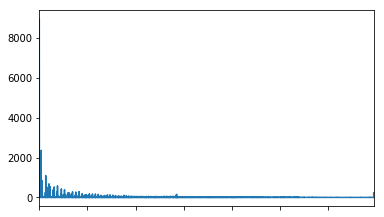

In [26]:
may_melted.idle_time.value_counts().sort_index().plot()

In [27]:
may_melted.to_csv('data/may_melted.csv')

In [28]:
print('After omitting the rows for probably not moving scooters, we have ' + str(may_melted.shape[0]) + ' rows for May')

After omitting the rows for probably not moving scooters, we have 288771 rows for May


In [29]:
print(str(may_sorted.shape[0]-may_melted.shape[0]) + ' rows are not required for May')

20003732 rows are not required for May


In [30]:
# To plot line with arrows, I used a function from a very helpful guy.

from collections import namedtuple
def get_bearing(p1, p2):
    
    '''
    Returns compass bearing from p1 to p2
    
    Parameters
    p1 : namedtuple with lat lon
    p2 : namedtuple with lat lon
    
    Return
    compass bearing of type float
    
    Notes
    Based on https://gist.github.com/jeromer/2005586
    '''
    
    long_diff = np.radians(p2.lon - p1.lon)
    
    lat1 = np.radians(p1.lat)
    lat2 = np.radians(p2.lat)
    
    x = np.sin(long_diff) * np.cos(lat2)
    y = (np.cos(lat1) * np.sin(lat2) 
        - (np.sin(lat1) * np.cos(lat2) 
        * np.cos(long_diff)))
    bearing = np.degrees(np.arctan2(x, y))
    
    # adjusting for compass bearing
    if bearing < 0:
        return bearing + 360
    return bearing
def get_arrows(locations, color='blue', size=6, n_arrows=3):
    
    '''
    Get a list of correctly placed and rotated 
    arrows/markers to be plotted
    
    Parameters
    locations : list of lists of lat lons that represent the 
                start and end of the line. 
                eg [[41.1132, -96.1993],[41.3810, -95.8021]]
    arrow_color : default is 'blue'
    size : default is 6
    n_arrows : number of arrows to create.  default is 3
    Return
    list of arrows/markers
    '''
    
    Point = namedtuple('Point', field_names=['lat', 'lon'])
    
    # creating point from our Point named tuple
    p1 = Point(locations[0][0], locations[0][1])
    p2 = Point(locations[1][0], locations[1][1])
    
    # getting the rotation needed for our marker.  
    # Subtracting 90 to account for the marker's orientation
    # of due East(get_bearing returns North)
    rotation = get_bearing(p1, p2) - 90
    
    # get an evenly space list of lats and lons for our arrows
    # note that I'm discarding the first and last for aesthetics
    # as I'm using markers to denote the start and end
    arrow_lats = np.linspace(p1.lat, p2.lat, n_arrows + 2)[1:n_arrows+1]
    arrow_lons = np.linspace(p1.lon, p2.lon, n_arrows + 2)[1:n_arrows+1]
    
    arrows = []
    
    #creating each "arrow" and appending them to our arrows list
    for points in zip(arrow_lats, arrow_lons):
        arrows.append(folium.RegularPolygonMarker(location=points, 
                      fill_color=color, number_of_sides=3, 
                      radius=size, rotation=rotation))
    return arrows

In [31]:
map_second = folium.Map(location= [may_melted.latitude[0], may_melted.longitude[0]], zoom_start=15)

colors = ['blue', 'red', 'green', 'gray']
colr = (a for a in colors)
next_col = 'purple'

for i in range(50):
    
    next_loc = [may_melted.latitude[i+1], may_melted.longitude[i+1]]
    loc = [may_melted.latitude[i], may_melted.longitude[i]]
    pop = ('SUMDID: ' + may_melted.sumdid[i] + '<br/>' +
           'Trip distance: ' + str(1000*may_melted.distance[i]) + ' meters' + '<br/>' +
#            'Trip duration: ' + str(may_melted.approx_trip_duration[i]) + '<br/>' +
           'Time: ' + str(may_melted.pubdatetime[i]) + '<br/>' +
           'Location: ' + str(may_melted.latitude[i]) + ', ' + str(may_melted.longitude[i]) )
    marker = folium.Marker(location = loc, popup = pop)
    arrows = get_arrows(locations=[loc, next_loc], color=next_col)

    #print(i)
    marker.add_to(map_second)
    if may_melted.sumdid[i]==may_melted.sumdid[i+1]:
        folium.PolyLine(locations=[loc, next_loc], color=next_col).add_to(map_second)
        for arrow in arrows:
            arrow.add_to(map_second)
    else:
        next_col = next(colr)

map_second

In [32]:
may_melted.head()

,pubdatetime,latitude,longitude,sumdid,companyname,distance,changed,distance_isgreater_thrsld,last_on_same_loc,pubdatetime_last,idle_time
0,2019-05-26 20:05:42.860,36.161835,-86.774021,Powered11XTN,Bird,NaN,False,False,False,2019-05-26 20:45:44.100,00:40:01.240000
1,2019-05-26 21:05:45.360,36.163459,-86.783549,Powered11XTN,Bird,1.071639,False,True,False,2019-05-26 21:45:46.647,00:40:01.287000
2,2019-05-26 22:05:47.370,36.170259,-86.788817,Powered11XTN,Bird,0.595882,False,True,False,2019-05-26 22:15:47.300,00:09:59.930000
3,2019-05-26 22:45:48.283,36.170966,-86.785398,Powered11XTN,Bird,0.437999,False,True,False,2019-05-26 22:50:48.410,00:05:00.127000
4,2019-05-26 23:15:49.113,36.171019,-86.789148,Powered11XTN,Bird,0.416981,False,True,False,2019-05-26 23:25:49.497,00:10:00.384000


In [33]:
# The location values have some peaks and may be in need a review. I do not have any estimation for this

# may_melted.longitude.value_counts().sort_index()[-86.85:-86.7].plot()

# may_melted.latitude.value_counts().sort_index()[36.1:36.25].plot()

# may_sorted.longitude.value_counts().sort_index()[-86.85:-86.7].plot()

# may_sorted.latitude.value_counts().sort_index()[36.1:36.25].plot()

# Trip data has come

I will create another notebook to analyze trip data